<a href="https://colab.research.google.com/github/Flavio-AzL/Desafio-Alura---TelecomX/blob/main/TelecomX_BR_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [ ]:

from google.colab import files
import pandas as pd
import io

print("Por favor, faça o upload do arquivo 'TelecomX_Data.json'")
uploaded = files.upload()

if not uploaded:
    print("\nNenhum arquivo foi enviado. A execução será interrompida.")
else:
    file_name = list(uploaded.keys())[0]

    # leitura do arquivo
    df_telecomx = pd.read_json(io.BytesIO(uploaded[file_name]))
    display(df_telecomx.head())

Por favor, faça o upload do arquivo 'TelecomX_Data.json'


Saving TelecomX_Data.json to TelecomX_Data (1).json

✅ Arquivo 'TelecomX_Data (1).json' carregado com sucesso!


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [ ]:
df_customer = pd.json_normalize(df_telecomx['customer'])
df_phone = pd.json_normalize(df_telecomx['phone'])
df_internet = pd.json_normalize(df_telecomx['internet'])
df_account = pd.json_normalize(df_telecomx['account'])

df_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [ ]:
df_phone.head()


,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [ ]:
df_internet.head()


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [ ]:
df_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df_telecomx_final = pd.concat([
    df_telecomx[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1) #  'axis=1' comando para a coluna


df_telecomx_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:


# Limpando data frame (celulas vazias)
colunas_texto = df_telecomx_final.select_dtypes(include=['object']).columns

for coluna in colunas_texto:
    # Para cada coluna de texto, conta quantas células contêm EXATAMENTE uma string vazia
    contagem_vazios = (df_telecomx_final[coluna] == '').sum()

    # laço para informação de colunas com celunas vazias
    if contagem_vazios > 0:
        print(f"Atenção! A coluna '{coluna}' possui {contagem_vazios} valores de string vazia.")
        problemas_encontrados += 1

if problemas_encontrados == 0:
    print(" Verificação concluída com sucesso. Nenhuma outra coluna possui valores de string vazia.")

Iniciando verificação final de strings vazias ('') em todas as colunas de texto...
⚠️ Atenção! A coluna 'Churn' possui 224 valores de string vazia.


In [ ]:
# Finalizando a limpeza
print(f"Tamanho original do DataFrame: {len(df_telecomx_final)} linhas")

# Filtrando para manter apenas as linhas válidas e criando uma cópia limpa
df_limpo = df_telecomx_final[df_telecomx_final['Churn'].isin(['Yes', 'No'])].copy()

# Verificando o novo tamanho do DataFrame
print(f"Tamanho do DataFrame após limpeza: {len(df_limpo)} linhas")

# Validando a proporção novamente no DataFrame limpo
print("\nNova Proporção de Churn (DataFrame Limpo):")
print(df_limpo['Churn'].value_counts(normalize=True) * 100)

Tamanho original do DataFrame: 7267 linhas
Tamanho do DataFrame após limpeza: 7043 linhas

Nova Proporção de Churn (DataFrame Limpo):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [ ]:
df_limpo['Charges.Total'] = pd.to_numeric(df_telecomx_final['Charges.Total'], errors='coerce')
df_limpo[['Charges.Total']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Charges.Total  7043 non-null   float64
dtypes: float64(1)
memory usage: 110.0 KB


In [ ]:
mediana_total_gastos = df_limpo['Charges.Total'].median()
mediana_total_gastos

1394.55

In [ ]:
df_limpo['Charges.Total'] = df_limpo['Charges.Total'].fillna(mediana_total_gastos)
df_limpo['Charges.Total'].median()

1394.55

In [ ]:
df_limpo['Charges.Total'].isnull().sum()

np.int64(0)

In [ ]:
# Criando a nova coluna 'Contas_Diarias'
df_limpo['Contas_Diarias'] = df_limpo['Charges.Monthly'] / 30

In [ ]:
# Validando a criação da coluna, mostrando a original e a nova
print("Validação da nova coluna 'Contas_Diarias':")
print(df_limpo[['Charges.Monthly', 'Contas_Diarias']].head())

Validação da nova coluna 'Contas_Diarias':
   Charges.Monthly  Contas_Diarias
0             65.6        2.186667
1             59.9        1.996667
2             73.9        2.463333
3             98.0        3.266667
4             83.9        2.796667


#📊 Carga e análise

In [ ]:
# Calcula a proporção de Churn em porcentagem
taxa_churn = df_limpo['Churn'].value_counts(normalize=True) * 100

print("Proporção de Churn:")
print(taxa_churn)

Proporção de Churn:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


/tmp/ipython-input-1735029361.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_limpo, x='Churn', palette=['#43a047', '#e53935'])


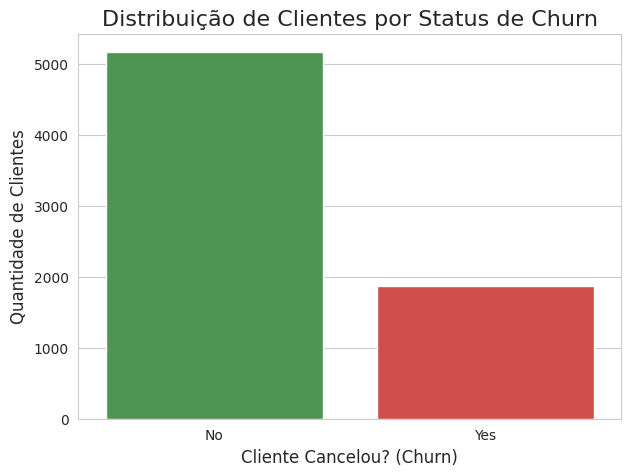

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define o estilo do gráfico
sns.set_style('whitegrid')

# Cria a figura para o gráfico
plt.figure(figsize=(7, 5))

# Cria o gráfico de contagem
ax = sns.countplot(data=df_limpo, x='Churn', palette=['#43a047', '#e53935'])

# Adiciona título e rótulos para maior clareza
ax.set_title('Distribuição de Clientes por Status de Churn', fontsize=16)
ax.set_xlabel('Cliente Cancelou? (Churn)', fontsize=12)
ax.set_ylabel('Quantidade de Clientes', fontsize=12)

# Mostra o gráfico
plt.show()

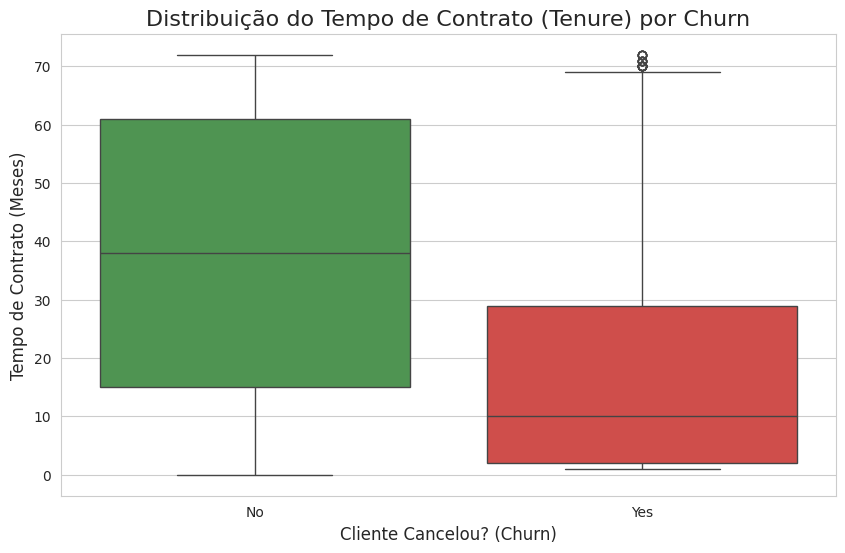

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define o estilo do gráfico
sns.set_style('whitegrid')

# Cria a figura para o gráfico
plt.figure(figsize=(10, 6))

# Cria o boxplot com a sintaxe atualizada
ax = sns.boxplot(data=df_limpo, x='Churn', y='tenure', hue='Churn', palette=['#43a047', '#e53935'], legend=False)

# Adiciona título e rótulos
ax.set_title('Distribuição do Tempo de Contrato (Tenure) por Churn', fontsize=16)
ax.set_xlabel('Cliente Cancelou? (Churn)', fontsize=12)
ax.set_ylabel('Tempo de Contrato (Meses)', fontsize=12)

# Mostra o gráfico
plt.show()

In [ ]:
import pandas as pd

# Cria uma tabela de cruzamento para ver a relação entre Contrato e Churn
# normalize='index' calcula a porcentagem por linha (por tipo de contrato)
churn_por_contrato = pd.crosstab(df_limpo['Contract'], df_limpo['Churn'], normalize='index') * 100

print("Taxa de Churn (%) por Tipo de Contrato:")
print(churn_por_contrato)

Taxa de Churn (%) por Tipo de Contrato:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


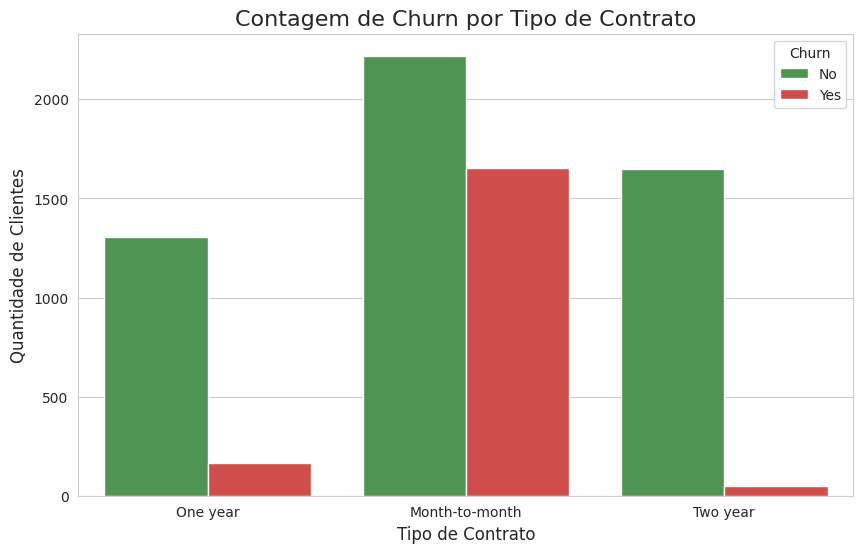

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define o tamanho da figura
plt.figure(figsize=(10, 6))
# Define o estilo
sns.set_style('whitegrid')

# Cria o gráfico de contagem
ax = sns.countplot(data=df_limpo, x='Contract', hue='Churn', palette=['#43a047', '#e53935'])

# Adiciona títulos e rótulos
ax.set_title('Contagem de Churn por Tipo de Contrato', fontsize=16)
ax.set_xlabel('Tipo de Contrato', fontsize=12)
ax.set_ylabel('Quantidade de Clientes', fontsize=12)
ax.legend(title='Churn')

# Mostra o gráfico
plt.show()

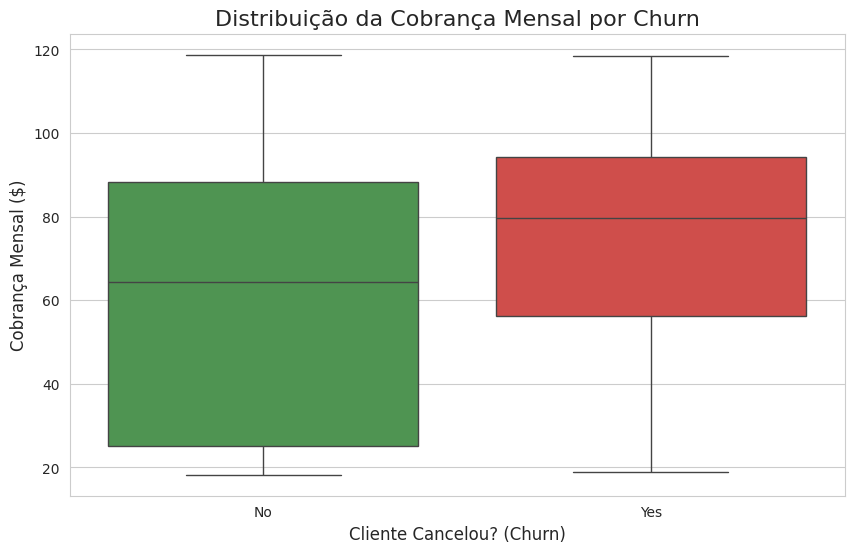

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Cria o boxplot para comparar a distribuição de 'Charges.Monthly' por 'Churn'
ax = sns.boxplot(data=df_limpo, x='Churn', y='Charges.Monthly', hue='Churn', palette=['#43a047', '#e53935'], legend=False)

ax.set_title('Distribuição da Cobrança Mensal por Churn', fontsize=16)
ax.set_xlabel('Cliente Cancelou? (Churn)', fontsize=12)
ax.set_ylabel('Cobrança Mensal ($)', fontsize=12)

plt.show()

In [ ]:
import pandas as pd

# Cria uma tabela de cruzamento para analisar Churn por InternetService
churn_por_internet = pd.crosstab(df_limpo['InternetService'], df_limpo['Churn'], normalize='index') * 100

print("Taxa de Churn (%) por Tipo de Serviço de Internet:")
print(churn_por_internet)

Taxa de Churn (%) por Tipo de Serviço de Internet:
Churn                   No        Yes
InternetService                      
DSL              81.040892  18.959108
Fiber optic      58.107235  41.892765
No               92.595020   7.404980


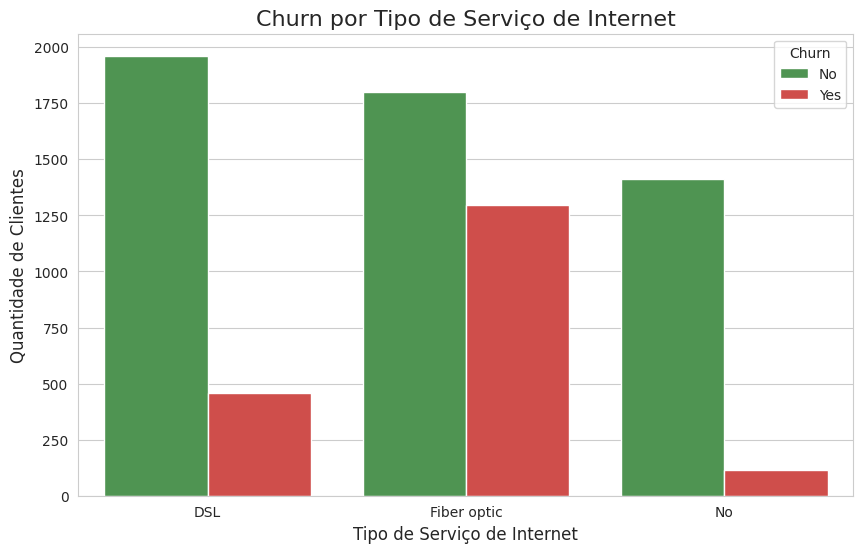

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Cria o gráfico de contagem para InternetService
ax = sns.countplot(data=df_limpo, x='InternetService', hue='Churn', palette=['#43a047', '#e53935'])

ax.set_title('Churn por Tipo de Serviço de Internet', fontsize=16)
ax.set_xlabel('Tipo de Serviço de Internet', fontsize=12)
ax.set_ylabel('Quantidade de Clientes', fontsize=12)
ax.legend(title='Churn')

plt.show()

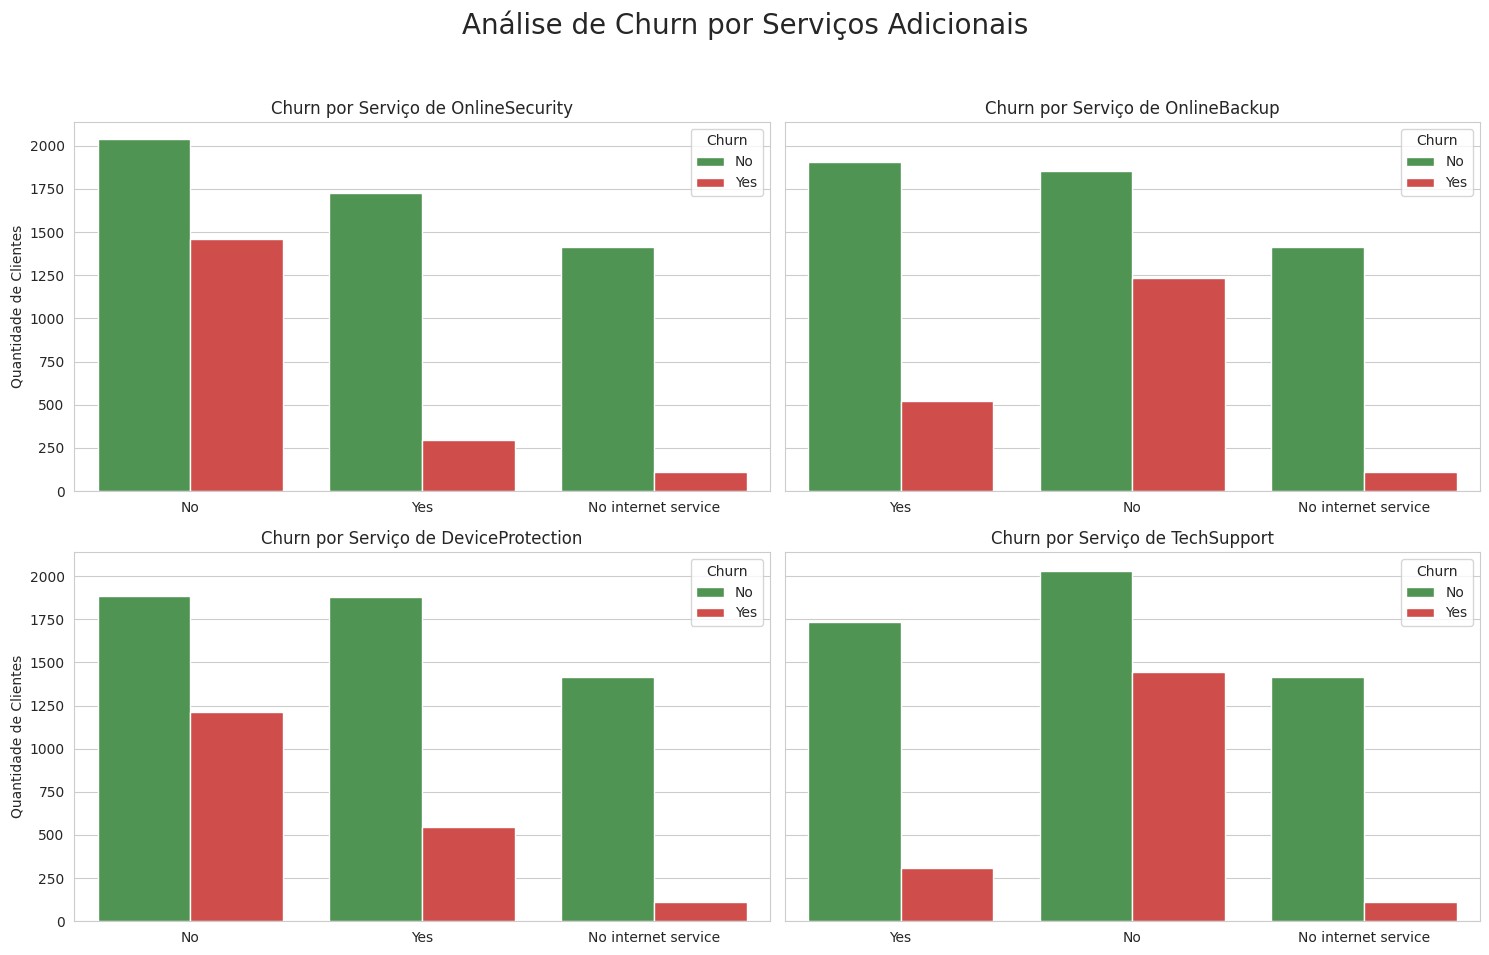

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista dos serviços que queremos analisar
servicos_adicionais = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Cria uma figura com 4 subplots (2 linhas, 2 colunas)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)

# Loop para criar um gráfico para cada serviço
for i, servico in enumerate(servicos_adicionais):
    # Define em qual subplot o gráfico será desenhado
    ax = axes[i//2, i%2]
    sns.countplot(data=df_limpo, x=servico, hue='Churn', palette=['#43a047', '#e53935'], ax=ax)
    ax.set_title(f'Churn por Serviço de {servico}')
    ax.set_xlabel('') # Remove o rótulo do eixo x para um visual mais limpo
    ax.set_ylabel('Quantidade de Clientes')
    ax.legend(title='Churn')

# Adiciona um título geral para a figura
fig.suptitle('Análise de Churn por Serviços Adicionais', fontsize=20)
# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#📄Relatorio Final

**Tipo de Contrato:** É o indicador mais forte. Clientes com contrato Mês a Mês (Month-to-month) apresentam uma taxa de churn alarmante de 42.7%, em comparação com apenas 11.3% (um ano) e 2.8% (dois anos).

**Tempo de Contrato (Tenure)**: A evasão é significativamente mais alta entre clientes novos. Metade dos clientes que cancelaram o fizeram com menos de 10 meses de serviço, indicando uma dificuldade na retenção inicial.

**Serviço de Internet:** Clientes com Fibra Ótica (Fiber optic) têm uma taxa de churn (aprox. 42%) mais que o dobro da taxa de clientes com DSL (aprox. 19%).

**Cobrança Mensal:** Clientes que cancelam tendem a ter faturas mensais mais altas. A mediana para quem cancela é de aproximadamente $80, contra $62.5 para quem permanece.

**Ausência de Serviços Adicionais:** A não contratação de serviços de valor agregado como Suporte Técnico (TechSupport) e Segurança Online (OnlineSecurity) está fortemente correlacionada a uma maior taxa de churn. Estes serviços funcionam como âncoras de fidelização.